<a href="https://colab.research.google.com/github/nickwinters1/DS-Unit-2-Sprint-2-Regression/blob/master/Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
1843,77,9000.0,3,223,2.5,0,1,2007,0
1154,59,10950.0,4,180,1.5,0,1,2011,0
7406,4,20900.0,0,185,4.2,3,1,2006,1
470,77,13500.0,5,124,2.0,0,1,2013,0
6581,24,2400.0,5,120,2.5,1,1,2008,2
2478,39,13000.0,3,64,1.6,1,1,2013,0
2700,67,10950.0,3,125,1.6,1,1,2011,0
6451,4,53700.0,0,67,3.0,3,1,2013,1
8279,52,7400.0,3,148,1.6,3,1,2008,0
4551,67,4700.0,3,235,1.9,2,0,2006,0


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

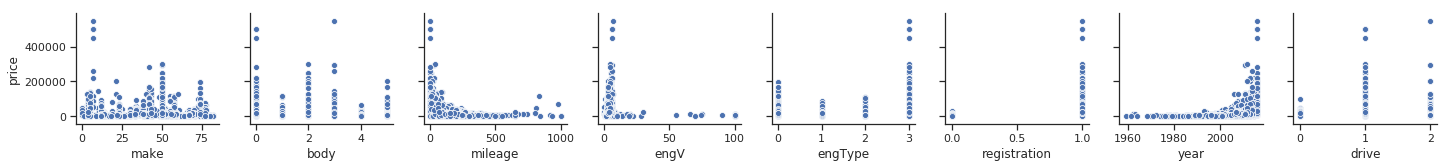

In [38]:
y = df['price']
X = df.drop(columns='price')
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=df, y_vars=['price'], x_vars=X.columns)
plt.show()

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [0]:
df_train, df_test = train_test_split(df.copy(), test_size = 0.2, random_state = 0)

features = ['make', 'body', 'mileage', 
            'engV', 'engType', 'registration',
            'year', 'drive']
target = 'price'

X_train = df_train[features]
X_test = df_test[features]
Y_train = pd.DataFrame(data=df_train[target], columns = [target])
Y_test = pd.DataFrame(data=df_test[target], columns = [target])

## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [99]:
regr = LinearRegression()
test_feat = ['year', 'mileage', 'body', 'engV']
regr.fit(X_train[test_feat], Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [100]:
print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)

Coefficients: [[ 1066.92112811   -34.83635579 -2625.16791432   414.39237857]]
Intercept: [-2114649.3121312]


## 1.5 Use the test data to make predictions.

In [0]:
Y_test_pred = regr.predict(X_test[test_feat])

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [104]:
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_test_pred)))
print("R^2:", r2_score(y_true = Y_test, y_pred = Y_test_pred))

RMSE: 20720.302279591986
R^2: 0.21161915690871225


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

The coefficient is positive, meaning later years correspond to higher prices. Every year that is added corresponds on average to a price increase of 1098.28

### 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

The regression line predicts the average y avlue associated with the given value of x. The RMSE is a measure of the y values spread around the average. 

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

R^2 measures the acurracy  of fit, equal to the percentage of the dependant variable.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df_train['ln_price'] = np.log(df_train['price'])
Y_train['ln_price'] = np.log(Y_train)
Y_test['ln_price'] = np.log(Y_test)

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

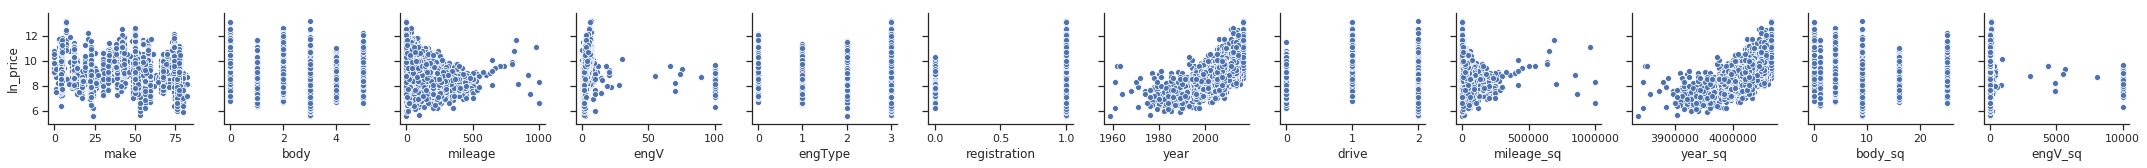

In [106]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=X.columns)
plt.show()

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [108]:
X_train['mileage**2'] = X_train['mileage']**2
X_test['mileage**2'] = X_test['mileage']**2
X_train['year**2'] = X_train['year']**2
X_test['year**2'] = X_test['year']**2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [111]:
target = 'ln_price'
new_regr = LinearRegression()
test_feat = ['year', 'mileage', 'body', 'engV', 'mileage**2', 'year**2']
new_regr.fit(X_train[test_feat], Y_train[target])
df_y_test_pred = new_regr.predict(X_test[test_feat])
print("Coefficients:", new_regr.coef_)
print("Intercept:", new_regr.intercept_)
print("R^2:", r2_score(y_true = Y_test[target], y_pred = df_y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_test[target], df_y_test_pred)))

Coefficients: [-8.60961831e+00  9.97143297e-04 -1.25280332e-01  1.50663922e-02
 -1.56228642e-07  2.17572167e-03]
Intercept: 8524.850620115481
R^2: 0.554215932139115
RMSE: 0.6430218601238622


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

Each coefficient relates to a percent different in the target variable, the coefficient shows a proportional change.

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [112]:
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X_train, Y_train['price'])

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [113]:
y_true = Y_test['price']
y_pred = tree.predict(X_test)
print("R^2 Score:", r2_score(y_true, y_pred))

R^2 Score: 0.6315207571503785


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [115]:
model = sm.OLS(Y_train['ln_price'], X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.867e+05
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        18:28:17   Log-Likelihood:                -5654.1
No. Observations:                6796   AIC:                         1.133e+04
Df Residuals:                    6786   BIC:                         1.140e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
make            -0.0016      0.000     -5.580   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [116]:
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
y = [i > 10 for i in vifs]
for col, vif, y in zip(X.columns, vifs, y):
    print(f'{col:15} {vif:<7.2f} {"<<" if y else ""}')

const           3423029618.12 <<
make            1.08    
body            11.29   <<
mileage         7.56    
engV            23.92   <<
engType         1.34    
registration    1.11    
year            164292.77 <<
drive           1.25    
mileage_sq      5.08    
year_sq         164633.03 <<
body_sq         11.58   <<
engV_sq         23.75   <<


There are several collinearity problems, which will require more work!